# 시계열 분석 실습

## Contents
1. 시계열 예측

  1-1) 데이터셋 불러오기

  1-2) 데이터 EDA

  1-3) 데이터 전처리

  1-4) 모델 생성 및 실행

  1-5) 결과 시각화 및 살펴보기


2. 시계열 분류

  2-1) 데이터셋 불러오기

  2-2) 데이터 EDA 및 데이터 전처리

  2-3) 모델 생성 및 실행

  2-4) 평가


3. 간략 과제

# 1. 시계열 예측

## 1-1) 데이터셋 불러오기

In [ ]:
import pandas as pd

In [ ]:
shampoo = pd.read_csv('https://raw.githubusercontent.com/enopus/time-series-practice/main/shampoo_data.csv')
shampoo

## 1-2) 데이터 EDA


In [ ]:
!pip install -U pandas-profiling

In [ ]:
import pandas_profiling

In [ ]:
shampoo_report = shampoo.profile_report()
shampoo_report

## 1-3) 데이터 전처리

In [ ]:
reindex_shampoo = shampoo.set_index('Month', inplace=False)
reindex_shampoo

In [ ]:
# reindex_shampoo.dropna(axis=0)
# reindex_shampoo.fillna(0)

preprocessed_shampoo = reindex_shampoo.loc['2001-01':'2003-12']
preprocessed_shampoo

In [ ]:
shampoo_report = shampoo.profile_report()
shampoo_report

In [ ]:
import matplotlib.pyplot as plt

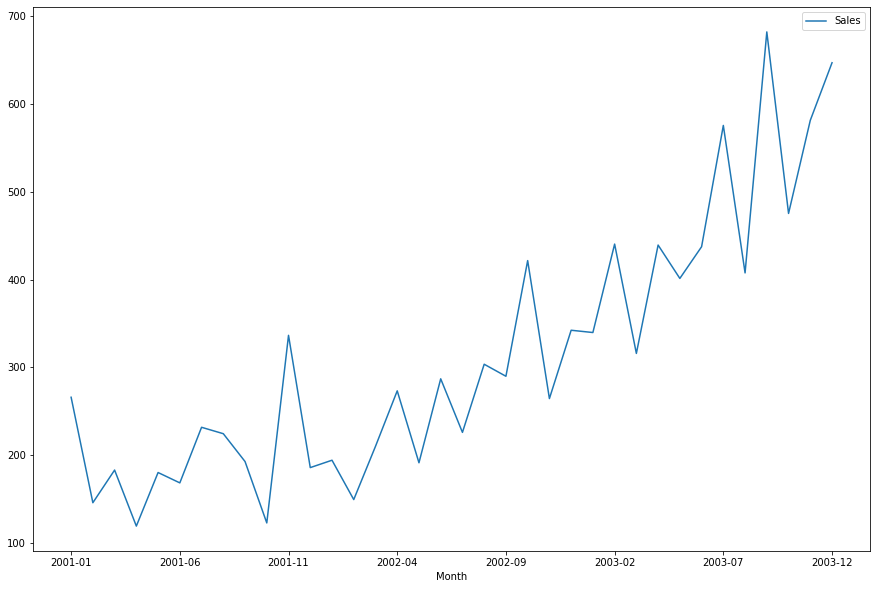

In [ ]:
# preprocessed_shampoo.plot(x='Month', y='Sales')
preprocessed_shampoo = preprocessed_shampoo.astype(float)
preprocessed_shampoo.plot(y='Sales', use_index=True, figsize=(15, 10))
plt.show()

### ◆ 데이터 분할

In [ ]:
sales = preprocessed_shampoo['Sales']
sales = list(sales)
sales

In [ ]:
x = []
y = []

for i in enumerate(sales):
  if i[0] < 3:
    continue
  
  else:
    previous_t3 = sales[i[0]-3]
    previous_t2 = sales[i[0]-2]
    previous_t1 = sales[i[0]-1]
    current_t = sales[i[0]]

    x.append([previous_t3, previous_t2, previous_t1])
    y.append(current_t)

print(x)
print('=========================================')
print(y)

In [ ]:
x_train = x[:-3]
x_train

In [ ]:
y_train = y[:-3]
y_train

In [ ]:
x_test = x[-3:]
x_test

In [ ]:
y_test = y[-3:]
y_test

### ◆ 데이터 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

print(x_train_sc)
print(x_test_sc)

## 1-4) 모델 생성 및 실행


In [ ]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# sample의 수, time step의 수, feature의 수
x_train_mlp = np.array(x_train_sc)
x_test_mlp = np.array(x_test_sc)
x_train_mlp

In [ ]:
x_train_mlp.shape

In [ ]:
x_train_lstm = np.reshape(x_train_sc, (-1, 3, 1))
x_test_lstm = np.reshape(x_test_sc, (-1, 3, 1))
x_train_lstm

In [ ]:
x_train_lstm.shape

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train

### ◆ MLP 모델 구축

In [ ]:
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=x_train_mlp.shape[1], activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(1))
adam = optimizers.adam_v2.Adam(lr=0.1)
mlp_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
mlp_model.summary()

In [ ]:
mlp_history = mlp_model.fit(x=x_train_mlp, y=y_train, epochs=1500)

In [ ]:
mlp_pred = mlp_model.predict(x_test_mlp)
mlp_pred

In [ ]:
mlp_shampoo = preprocessed_shampoo
mlp_shampoo['predict'] = mlp_shampoo['Sales']
mlp_pred = np.reshape(mlp_pred, (3))
mlp_shampoo.loc[-3:, 'predict'] = mlp_pred

In [ ]:
# predict_shampoo.plot(y='Sales', use_index=True, figsize=(15, 10), subplots=True)
mlp_shampoo.plot(use_index=True, figsize=(15, 10), subplots=False)
plt.show()

### ◆ LSTM 모델 구축

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(10, activation='relu', input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
lstm_model.summary()

In [ ]:
lstm_history = lstm_model.fit(x_train_lstm, y_train, epochs=500)

In [ ]:
lstm_pred = lstm_model.predict(x_test_lstm)
lstm_pred

In [ ]:
lstm_shampoo = preprocessed_shampoo
lstm_shampoo['predict'] = lstm_shampoo['Sales']
lstm_pred = np.reshape(lstm_pred, (3))
lstm_shampoo.loc[-3:, 'predict'] = lstm_pred

In [ ]:
lstm_shampoo.plot(use_index=True, figsize=(15, 10))
plt.show()

## 1-5) 결과 시각화 및 살펴보기


In [ ]:
mlp_history_df = pd.DataFrame(mlp_history.history)
mlp_history_df.plot(use_index=True, figsize=(15, 10))
plt.show()

In [ ]:
lstm_history_df = pd.DataFrame(lstm_history.history)
lstm_history_df.plot(use_index=True, figsize=(15, 10))
plt.show()

# 2. 시계열 분류


## 2-1) 데이터셋 불러오기

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
wafer_train = pd.read_csv('https://raw.githubusercontent.com/enopus/time-series-practice/main/wafer_train.csv', header=None)
wafer_train

In [ ]:
wafer_test = pd.read_csv('https://raw.githubusercontent.com/enopus/time-series-practice/main/wafer_test.csv', header=None)
wafer_test

## 2-2) 데이터 EDA 및 전처리

In [ ]:
wafer_train.isna().sum()

In [ ]:
wafer_train.isna().sum().sum()

In [ ]:
wafer_sample = wafer_train.loc[:5, :]
wafer_sample = wafer_sample.transpose()
wafer_sample.plot(use_index=True, figsize=(15, 10), subplots=True)

In [ ]:
x_train = wafer_train.loc[:, 1:]
x_train

In [ ]:
y_train = wafer_train.loc[:, 0]
y_train

In [ ]:
x_test = wafer_test.loc[:, 1:]
y_test = wafer_test.loc[:, 0]

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

In [ ]:
cond_test_ab = y_test == -1
cond_train_ab = y_train == -1

cond_test_nor = y_test == 1
cond_train_nor = y_train == 1

y_train[cond_train_nor]

In [ ]:
y_train[cond_train_nor] = 0
y_train[cond_train_ab] = 1

y_test[cond_test_nor] = 0
y_test[cond_test_ab] = 1

print(y_test)
print(y_train)

print(y_test.value_counts())
print(y_train.value_counts())

In [ ]:
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train)
print(y_train)

In [ ]:
x_train_mlp = np.array(x_train)

x_train_lstm = np.array(x_train)
x_train_lstm = np.reshape(x_train_lstm, (x_train_lstm.shape[0], x_train_lstm.shape[1], 1))
print(x_train_lstm.shape)

In [ ]:
x_test_mlp = np.array(x_test)

x_test_lstm = np.array(x_test)
x_test_lstm = np.reshape(x_test_lstm, (x_test_lstm.shape[0], x_test_lstm.shape[1], 1))


x_valid_mlp = np.array(x_valid)

x_valid_lstm = np.array(x_valid)
x_valid_lstm = np.reshape(x_valid_lstm, (x_valid_lstm.shape[0], x_valid_lstm.shape[1], 1))

y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

## 2-3) 모델 생성 및 실행

In [ ]:
import tensorflow as tf
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
tf.random.set_seed(200)
np.random.seed(1)

### ◆ MLP 모델 구축

In [ ]:
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=x_train_mlp.shape[1], activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(1, activation='sigmoid'))
adam_mlp = optimizers.adam_v2.Adam(lr=0.005)
mlp_model.compile(loss='binary_crossentropy', optimizer=adam_mlp, metrics=['acc'])
mlp_model.summary()

In [ ]:
weight = {0: 1,
          1: 8}
# mlp_history = mlp_model.fit(x=x_train_mlp, y=y_train, validation_data=(x_valid_mlp, y_valid), epochs=30, class_weight=weight)

mlp_history = mlp_model.fit(x=x_train_mlp, y=y_train, validation_data=(x_valid_mlp, y_valid), epochs=30)


In [ ]:
mlp_eval = mlp_model.evaluate(x_test, y_test)
print(mlp_eval)

### ◆ LSTM 모델 구축

In [ ]:
tf.random.set_seed(200)
np.random.seed(1)

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(10, activation='relu', input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))
adam_lstm = optimizers.adam_v2.Adam(lr=0.005)
lstm_model.compile(loss='binary_crossentropy', optimizer=adam_lstm, metrics=['acc'])
lstm_model.summary()

In [ ]:
lstm_history = lstm_model.fit(x_train_lstm, y_train, validation_data=(x_valid_lstm, y_valid), epochs=10, class_weight=weight)

In [ ]:
lstm_eval = lstm_model.evaluate(x_test_lstm, y_test)
print(lstm_eval)

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.value_counts()

In [ ]:
mlp_history_df = pd.DataFrame(mlp_history.history)
mlp_history_df.plot(use_index=True, figsize=(15, 10), y=['loss', 'val_loss'])

In [ ]:
mlp_history_df.plot(use_index=True, figsize=(15, 10), y=['acc', 'val_acc'])

In [ ]:
lstm_history_df = pd.DataFrame(lstm_history.history)
lstm_history_df.plot(use_index=True, figsize=(15, 10), y=['loss', 'val_loss'])

In [ ]:
lstm_history_df.plot(use_index=True, figsize=(15, 10), y=['acc', 'val_acc'])

## 2-4) 평가

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
def classifier_eval(y_test, y_pred):
    print('오차행렬 : ', confusion_matrix(y_test, y_pred))
    print('정확도   : ', accuracy_score(y_test, y_pred))
    print('정밀도   : ', precision_score(y_test, y_pred))
    print('재현율   : ', recall_score(y_test, y_pred))
    print('F1       : ', f1_score(y_test, y_pred))
    print('AUC      : ', roc_auc_score(y_test, y_pred))

In [ ]:
mlp_pred = mlp_model.predict(x_test_mlp)
mlp_pred[mlp_pred <= 0.5] = 0
mlp_pred[mlp_pred > 0.5] = 1

In [ ]:
lstm_pred = lstm_model.predict(x_test_lstm)
lstm_pred[lstm_pred <= 0.5] = 0
lstm_pred[lstm_pred > 0.5] = 1

In [ ]:
mlp_pred.astype(int)

In [ ]:
lstm_pred.astype(int)

In [ ]:
classifier_eval(y_test, mlp_pred)

In [ ]:
classifier_eval(y_test, lstm_pred)

# 3. 과제

오늘 배운 내용에 따라서 데이터를 어떻게 전처리하고, 모델을 돌릴 것인지 개략적으로 간단한 그림이나 순서도 형태로 설명해봅시다. (형식자유)

그리고 불균형 데이터(imbalanced data)에서는 정확도가 평가지표로 잘 쓰이지 않기 때문에 재현율(recall), 정밀도(precision), F1-스코어가 주로 쓰입니다.

해당 평가 지표를 다시 한 번 생각해보고 정의와 구하는 방법을 작성해봅시다.

정답은 9.30일 금요일 저녁 중으로 github에 올라갈 예정입니다.

끝으로 수업 들으신다고 다들 고생하셨습니다!

